### Importing necessary libraries

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shapereader

### Reading the Data

In [2]:
cru = xr.open_dataset('/home/little/Desktop/PROJECT_WORK/cru_ts4.06.1901.2021.tmp.dat.nc').tmp

### Reading shape file

In [3]:
shape_file = list(shapereader.Reader(str(('/home/little/Desktop/PROJECT_WORK/GHA_adm/GHA_adm0.shp'))).geometries())

#### select past and present data from the main data

In [4]:
past = cru.sel(time = slice('1990','1999'), lon = slice(-3.5, 1.5), lat = slice(4,11.5))
present = cru.sel(time = slice('2006','2017'), lon = slice(-3.5, 1.5), lat = slice(4,11.5))

## computing for the monthly climatology

In [5]:
## monthly climatology
monthly_past_climo = past.groupby('time.month').mean('time')
monthly_present_climo = present.groupby('time.month').mean('time')

### Visualising the past monthly climo

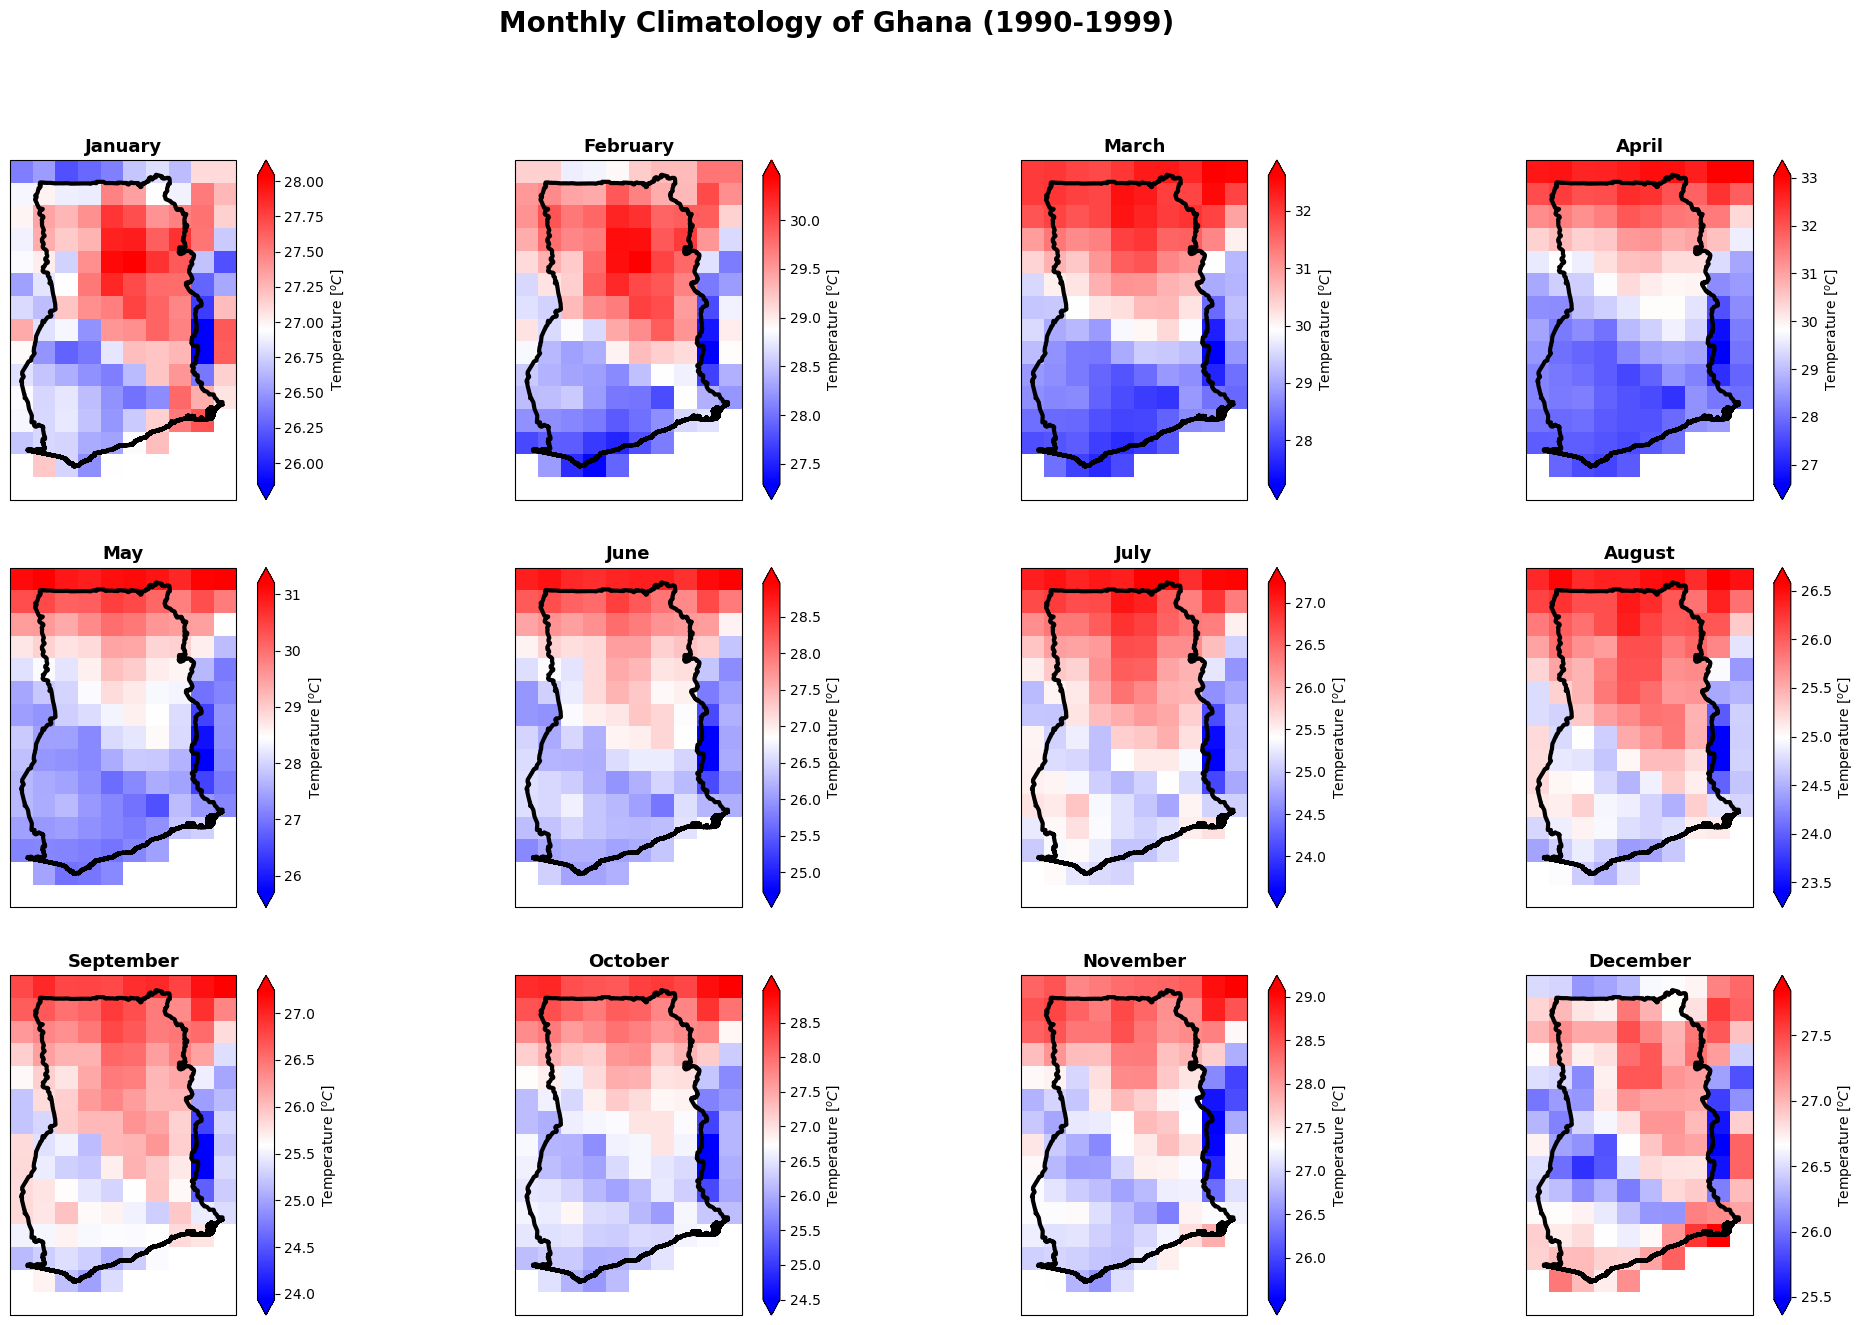

In [6]:
fig, axes = plt.subplots(ncols = 4, nrows = 3, figsize=(25,15),subplot_kw={'projection': ccrs.PlateCarree()})

titles = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
          'November', 'December']
plt.suptitle('Monthly Climatology of Ghana (1990-1999)', fontweight = 'bold', fontsize = 20)
ax = axes.flatten()
for i, a in enumerate(ax):
    
    ax[i].set_extent([-3.5, 1.5, 4,11.5 ], crs = ccrs.PlateCarree() )

    ### Plotting Ghana map
    ax[i].add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor = 'none', lw = 3)
   
   ### plotting the data 
    a = monthly_past_climo[i].plot(cmap = 'bwr', ax = ax[i], 
                                   cbar_kwargs = {"label": "Temperature [$^o C$]", "extend":"both"})
    
    ## setting titles
    ax[i].set_title(titles[i], fontweight = 'bold', fontsize = 13)
#plt.savefig('Monthly_Climatology_of_Ghana_past.jpg')

### Visualising the present monthly climo

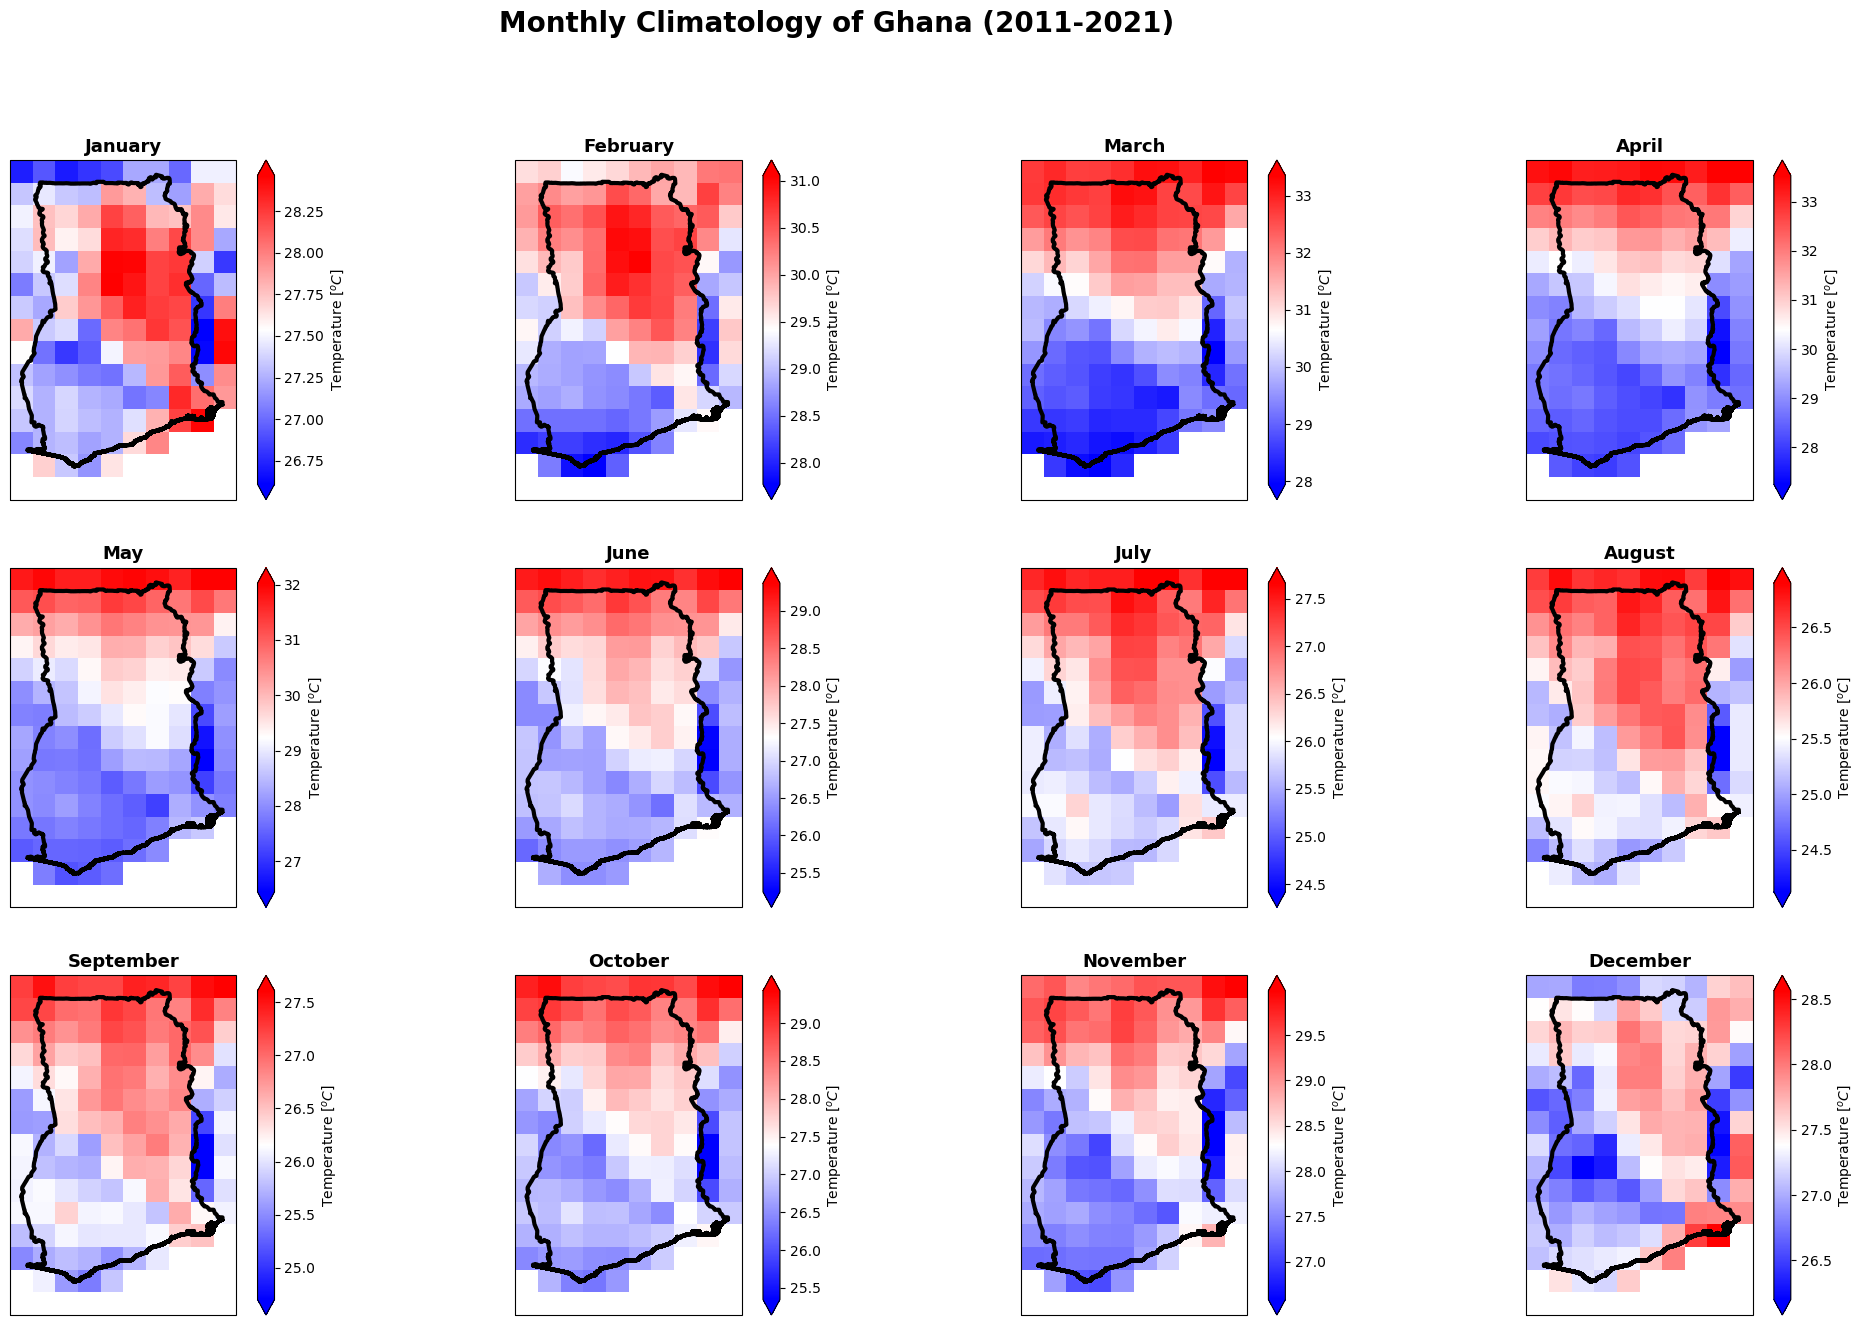

In [7]:
fig, axes = plt.subplots(ncols = 4, nrows = 3, figsize=(25,15),subplot_kw={'projection': ccrs.PlateCarree()})

titles = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
          'September', 'October','November', 'December']
plt.suptitle('Monthly Climatology of Ghana (2011-2021)', fontweight = 'bold', fontsize = 20)

ax = axes.flatten()
for i, a in enumerate(ax):

    ax[i].set_extent([-3.5, 1.5, 4,11.5 ], crs = ccrs.PlateCarree() )

    ax[i].set_title(titles[i], fontsize = 13, fontweight = 'bold')
    
    ax[i].add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor = 'none', lw = 3)
   

    
    a = monthly_present_climo[i].plot(cmap = 'bwr', ax = ax[i], 
                                      cbar_kwargs = {"label": "Temperature [$^o C$]", "extend":"both"})
    
    ax[i].set_title(titles[i], fontweight = 'bold',fontsize = 13)

#plt.savefig('Monthly_Climatology_of_Ghana_present.jpg')

## computing for the overall mean for the past

In [8]:
overall_mean_past = past.mean('time')
overall_mean_present = present.mean('time')

####  Visualising overall mean for the past

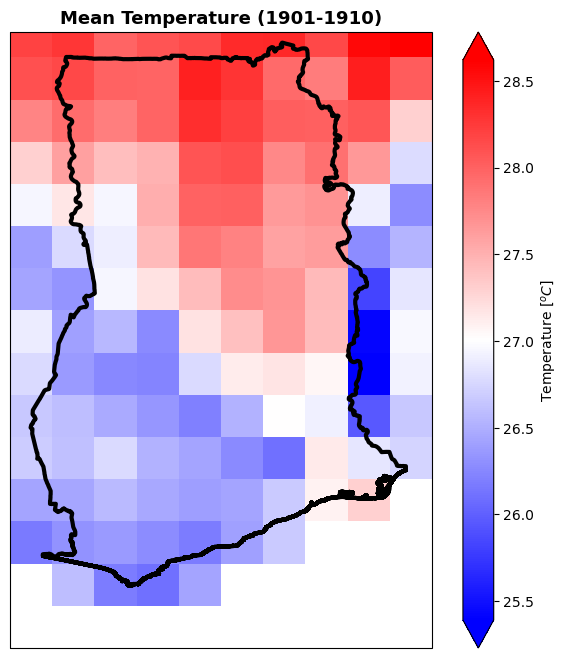

In [9]:
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': ccrs.PlateCarree()})
ax. set_extent([-3.5, 1.5, 4,11.3 ], crs = ccrs.PlateCarree() )

# add the administrative borders from the shapefile
ax.add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor='none', lw =3)

#plotting
overall_mean_past.plot(cmap = 'bwr', cbar_kwargs = {"label": "Temperature [$^o C$]", "extend":"both"})

#title
ax.set_title('Mean Temperature (1901-1910)', fontsize = 13, fontweight = 'bold')
#plt.savefig('Mean_Temperature_(1901-1910).jpg')

####  Visualising overall mean for the present

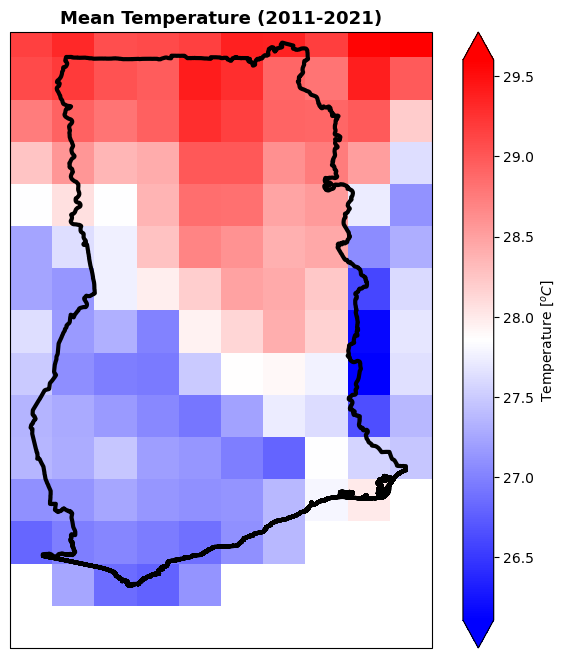

In [10]:
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': ccrs.PlateCarree()})
ax. set_extent([-3.5, 1.5, 4,11.3 ], crs = ccrs.PlateCarree() )

# add the administrative borders from the shapefile
ax.add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor='none', lw =3)

#plotting
overall_mean_present.plot(cmap = 'bwr', cbar_kwargs = {"label": "Temperature [$^o C$]", "extend":"both"})

#title
ax.set_title('Mean Temperature (2011-2021)', fontsize = 13, fontweight = 'bold')
#plt.savefig('Mean_Temperature_(2011-2021.jpg')

## Difference

In [11]:
 diff = overall_mean_past-overall_mean_present

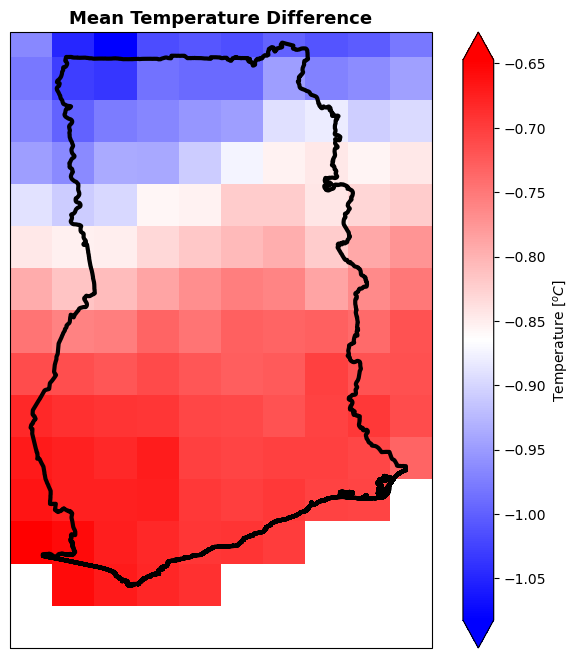

In [12]:
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': ccrs.PlateCarree()})
ax. set_extent([-3.5, 1.5, 4,11.3 ], crs = ccrs.PlateCarree() )

# add the administrative borders from the shapefile
ax.add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor='none', lw =3)

#plotting
diff.plot(cmap = 'bwr', cbar_kwargs = {"label": "Temperature [$^o C$]", "extend":"both"})

#title
ax.set_title('Mean Temperature Difference', fontsize = 13, fontweight = 'bold')
#plt.savefig('Mean_Temperature_(2011-2021.jpg')

## computing for the annual climatology

In [13]:
### Annual climatology

annual_past_climo = past.groupby('time.year').mean('time')
annual_present_climo = present.groupby('time.year').mean('time')

#### visualising the annual climo for the past

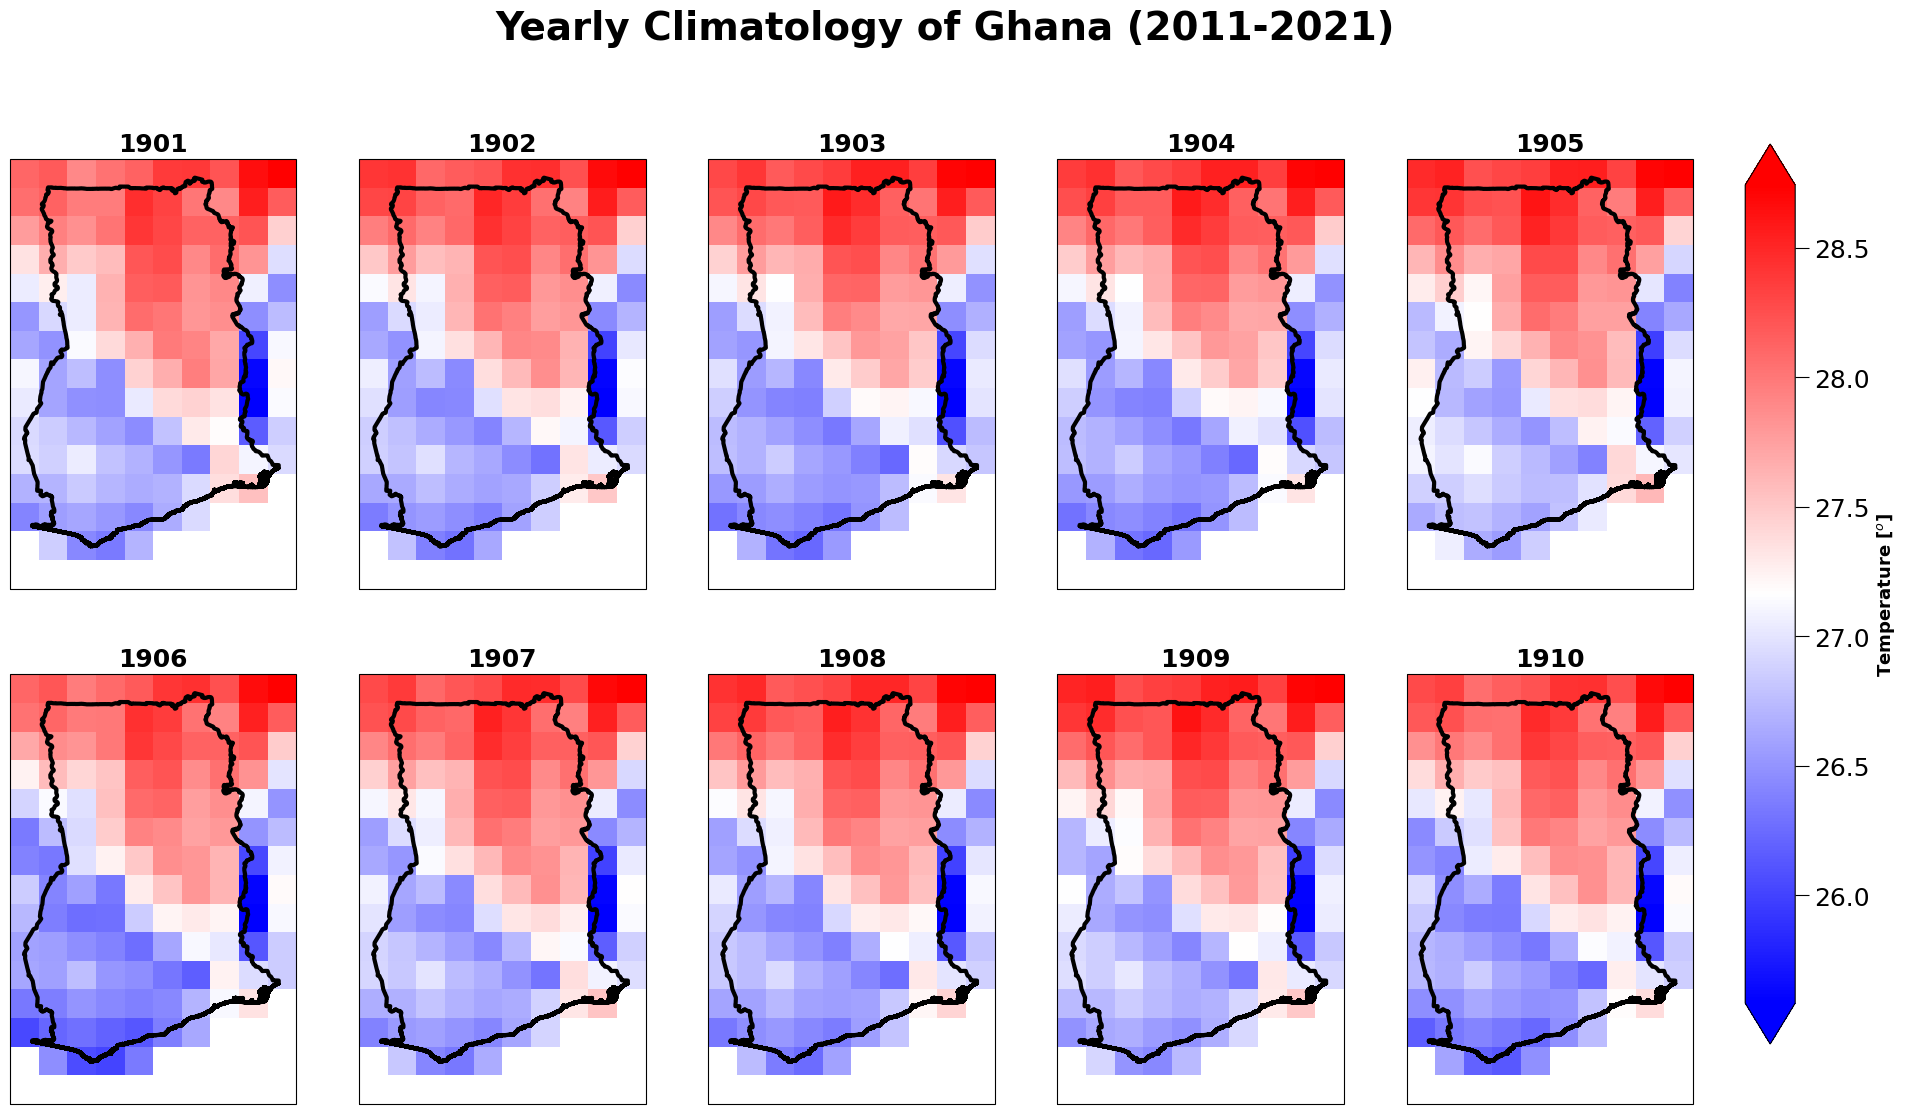

In [14]:
fig, axes = plt.subplots(ncols = 5, nrows = 2, figsize=(25,15),subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(bottom = 0.25,right = 0.8)
titles = ['1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908' ,'1909 ','1910']
plt.suptitle('Yearly Climatology of Ghana (2011-2021)', fontweight = 'bold', fontsize = 28)

ax = axes.flatten()
for i, a in enumerate(ax):

    ax[i].set_extent([-3.5, 1.5, 4,11.5 ], crs = ccrs.PlateCarree() )

    ax[i].set_title(titles[i], fontsize = 13, fontweight = 'bold')
    
    ax[i].add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor = 'none', lw = 3)
   

    
    a = annual_past_climo[i].plot(cmap = 'bwr', ax = ax[i], add_colorbar = False)
    
    ax[i].set_title(titles[i], fontweight = 'bold',fontsize = 18)
    
#cb = fig.add_axes([0.18, 0.21, 0.66, 0.025])
cb1 = fig.add_axes([0.82, 0.29, 0.02, 0.6])
cbar = fig.colorbar(a, cax = cb1, orientation = 'vertical', label = 'Temperature [$^o$]', extend = 'both')
cbar.ax.tick_params(size = 10)
cbar.ax.tick_params(labelsize = 18)
cbar.set_label('Temperature [$^o$]', size = 13, weight = 'bold')

#plt.savefig('Monthly_Climatology_of_Ghana_present.jpg')

### variabilities

In [15]:
past_mon = past.resample(time = '1M').mean(['time','lon','lat'])
present_mon = present.resample(time = '1M').mean(['time','lon','lat'])


### yearly varibilities
past_yy = past.resample(time = '1Y').mean(['time','lon','lat'])
present_yy = present.resample(time = '1Y').mean(['time','lon','lat'])

#### Visualising the monthly timesries plot

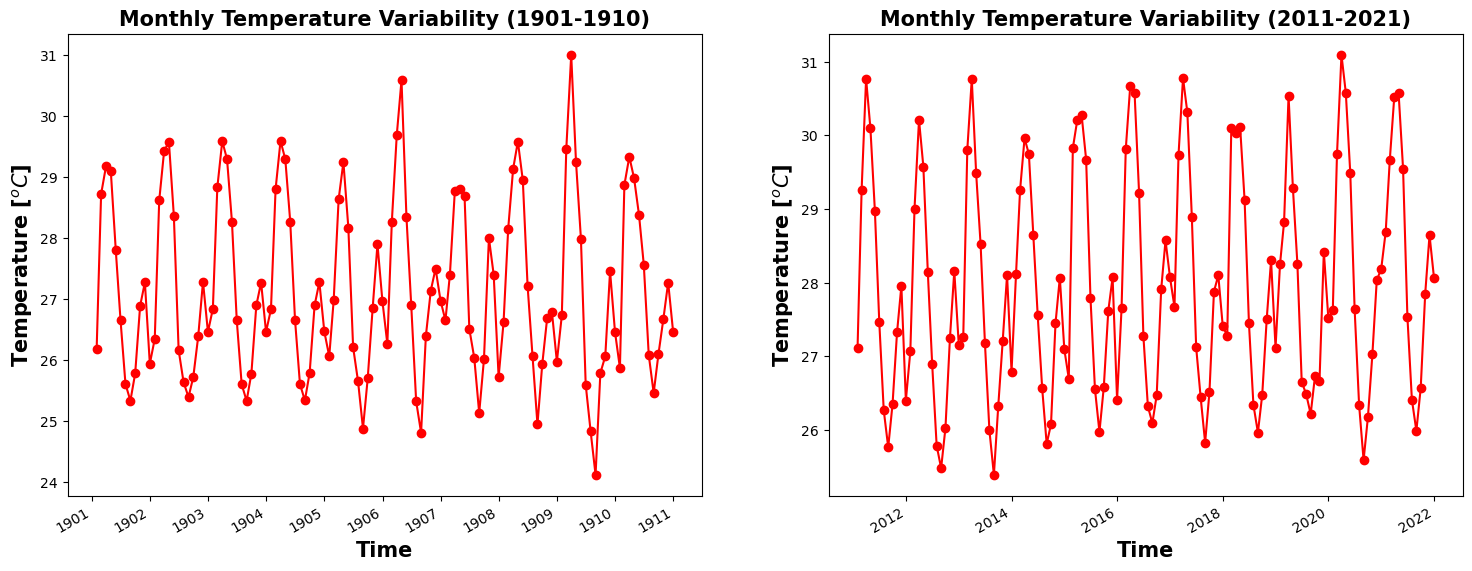

In [16]:
fig, axes = plt.subplots(ncols = 2, nrows = 1,figsize = (18,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)


# ploting timseries
past_mon.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6', ax = axes[0])
present_mon.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6', ax = axes[1])


## titles
axes[0].set_title('Monthly Temperature Variability (1901-1910)', fontweight = 'bold', fontsize = 15)
axes[1].set_title('Monthly Temperature Variability (2011-2021)', fontweight = 'bold', fontsize = 15)

axes[0].set_ylabel('Temperature [$^o C$]', fontweight = 'bold', fontsize = 15)
axes[1].set_ylabel('Temperature [$^o C$]', fontweight = 'bold', fontsize = 15)

axes[0].set_xlabel('Time', fontweight = 'bold', fontsize = 15)
axes[1].set_xlabel('Time', fontweight = 'bold', fontsize = 15)

#plt.savefig('monthly_timeries.jpg')

#### Visualising the yearly timesries plot

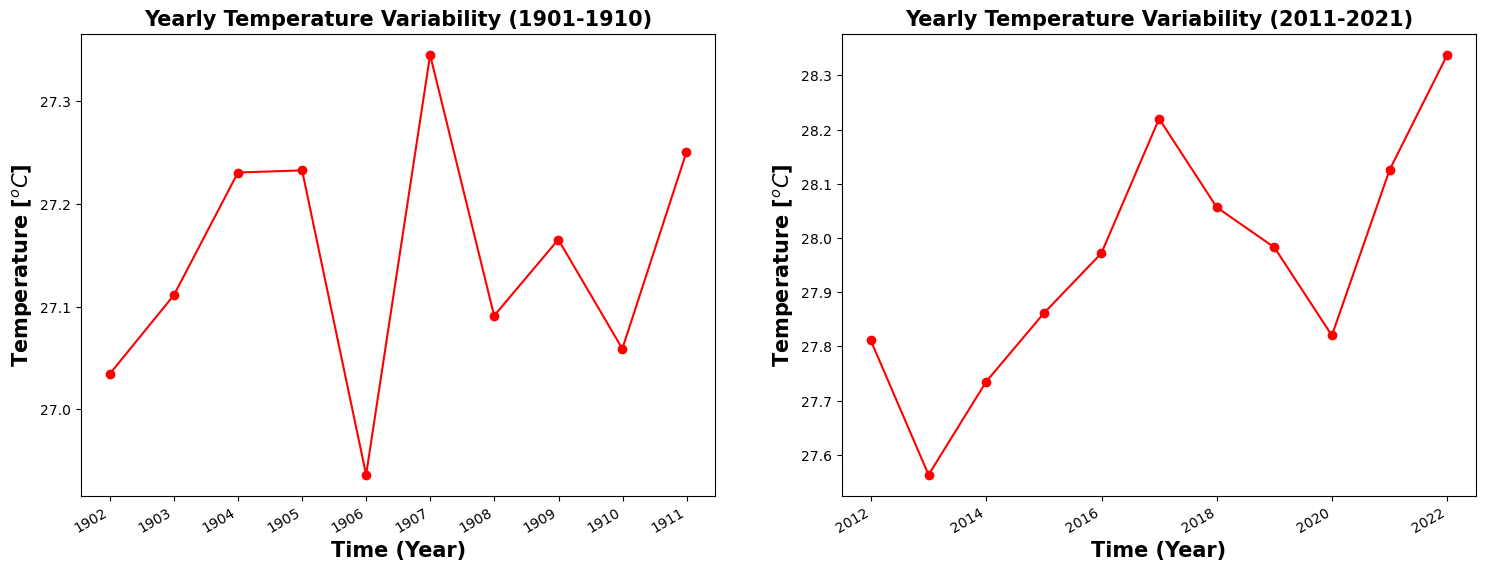

In [17]:
fig, axes = plt.subplots(ncols = 2, nrows = 1,figsize = (18,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)


# ploting timseries
past_yy.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6', ax = axes[0])
present_yy.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6', ax = axes[1])


## titles
axes[0].set_title('Yearly Temperature Variability (1901-1910)', fontweight = 'bold', fontsize = 15)
axes[1].set_title('Yearly Temperature Variability (2011-2021)', fontweight = 'bold', fontsize = 15)

axes[0].set_ylabel('Temperature [$^o C$]', fontweight = 'bold', fontsize = 15)
axes[1].set_ylabel('Temperature [$^o C$]', fontweight = 'bold', fontsize = 15)

axes[0].set_xlabel('Time (Year)', fontweight = 'bold', fontsize = 15)
axes[1].set_xlabel('Time (Year)', fontweight = 'bold', fontsize = 15)
#plt.savefig('yearly_timeries.jpg')